In [129]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import plotly.express as px
import numpy as np
import hvplot.pandas
import seaborn as sns
%matplotlib inline

In [3]:
# Load .env environment variables
load_dotenv("alpacakey.env")

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
alpaca_api_key

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


'PKYBNSJEF2WU2ZXLIM4N'

In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [7]:
# Format current date as ISO format
today = pd.Timestamp("2021-4-13", tz="America/New_York").isoformat()
begin = pd.Timestamp("2020-3-17", tz="America/New_York").isoformat()

In [8]:
# Set the tickers
tickers = ["TSLA", "GME"]
shares_data = {}

In [9]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [10]:
# Get current closing prices for TSLA and GME
tesla_gamestop_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = begin,
    end = today,
    limit = 1000
).df

# Display sample data
tesla_gamestop_portfolio

GME                                       \
                             open      high     low    close    volume   
time                                                                     
2020-03-17 00:00:00-04:00    4.40    4.6500    4.11    4.230   3193488   
2020-03-18 00:00:00-04:00    4.10    4.2500    3.50    3.780   3083498   
2020-03-19 00:00:00-04:00    3.71    4.2000    3.55    4.190   4750379   
2020-03-20 00:00:00-04:00    4.08    4.0800    3.65    3.755   5301562   
2020-03-23 00:00:00-04:00    3.58    3.8600    3.50    3.810   5586664   
...                           ...       ...     ...      ...       ...   
2021-04-07 00:00:00-04:00  183.40  184.4999  176.11  177.730   4429913   
2021-04-08 00:00:00-04:00  185.86  185.8800  164.30  170.240   9077021   
2021-04-09 00:00:00-04:00  169.90  171.5800  153.00  158.320   9196674   
2021-04-12 00:00:00-04:00  158.10  163.9000  135.01  141.070  16290274   
2021-04-13 00:00:00-04:00  141.85  145.3771  132.00  140.720   6436582   

                               TSLA                                        
                               open      high      low    close    volume  
time                                                                       
2020-03-17 00:00:00-04:00  440.0100  471.8500  396.000  430.000  23150951  
2020-03-18 00:00:00-04:00  389.0000  404.8600  350.510  361.600  39991154  
2020-03-19 00:00:00-04:00  374.6965  452.0000  358.460  427.295  28716890  
2020-03-20 00:00:00-04:00  438.2000  477.0000  425.790  427.530  27182628  
2020-03-23 00:00:00-04:00  433.5500  441.9999  410.500  434.290  15611610  
...                             ...       ...      ...      ...       ...  
2021-04-07 00:00:00-04:00  687.0000  691.3800  667.840  671.030  25229548  
2021-04-08 00:00:00-04:00  677.3800  689.5499  671.645  683.770  22310546  
2021-04-09 00:00:00-04:00  677.7700  680.9700  669.430  677.020  20359010  
2021-04-12 00:00:00-04:00  685.7200  704.8000  682.090  701.630  27539935  
2021-04-13 00:00:00-04:00  712.5600  763.0000  710.660  762.350  42476139  

[271 rows x 10 columns]

In [11]:
tesla_1 = tesla_gamestop_portfolio["TSLA"][["close"]]
tesla_1

,close
time,
2020-03-17 00:00:00-04:00,430.000
2020-03-18 00:00:00-04:00,361.600
2020-03-19 00:00:00-04:00,427.295
2020-03-20 00:00:00-04:00,427.530
2020-03-23 00:00:00-04:00,434.290
...,...
2021-04-07 00:00:00-04:00,671.030
2021-04-08 00:00:00-04:00,683.770
2021-04-09 00:00:00-04:00,677.020


In [12]:
tesla_1 = tesla_1.rename(columns={ "close":"Tesla"})
tesla_1

,Tesla
time,
2020-03-17 00:00:00-04:00,430.000
2020-03-18 00:00:00-04:00,361.600
2020-03-19 00:00:00-04:00,427.295
2020-03-20 00:00:00-04:00,427.530
2020-03-23 00:00:00-04:00,434.290
...,...
2021-04-07 00:00:00-04:00,671.030
2021-04-08 00:00:00-04:00,683.770
2021-04-09 00:00:00-04:00,677.020


In [13]:
gamestop_2 = tesla_gamestop_portfolio["GME"][["close"]]
gamestop_2

,close
time,
2020-03-17 00:00:00-04:00,4.230
2020-03-18 00:00:00-04:00,3.780
2020-03-19 00:00:00-04:00,4.190
2020-03-20 00:00:00-04:00,3.755
2020-03-23 00:00:00-04:00,3.810
...,...
2021-04-07 00:00:00-04:00,177.730
2021-04-08 00:00:00-04:00,170.240
2021-04-09 00:00:00-04:00,158.320


In [14]:
gamestop_2 = gamestop_2.rename(columns={ "close":"Gamestop"})
gamestop_2

,Gamestop
time,
2020-03-17 00:00:00-04:00,4.230
2020-03-18 00:00:00-04:00,3.780
2020-03-19 00:00:00-04:00,4.190
2020-03-20 00:00:00-04:00,3.755
2020-03-23 00:00:00-04:00,3.810
...,...
2021-04-07 00:00:00-04:00,177.730
2021-04-08 00:00:00-04:00,170.240
2021-04-09 00:00:00-04:00,158.320


In [15]:
tesla_game_joined = pd.concat([tesla_1, gamestop_2], axis="columns", join="inner")
tesla_game_joined

,Tesla,Gamestop
time,,
2020-03-17 00:00:00-04:00,430.000,4.230
2020-03-18 00:00:00-04:00,361.600,3.780
2020-03-19 00:00:00-04:00,427.295,4.190
2020-03-20 00:00:00-04:00,427.530,3.755
2020-03-23 00:00:00-04:00,434.290,3.810
...,...,...
2021-04-07 00:00:00-04:00,671.030,177.730
2021-04-08 00:00:00-04:00,683.770,170.240
2021-04-09 00:00:00-04:00,677.020,158.320


In [16]:
tesla_game_joined.to_csv("tesla_game_joined.csv")

In [17]:
tesla_gamestop_portfolio.dtypes

GME   open      float64
      high      float64
      low       float64
      close     float64
      volume      int64
TSLA  open      float64
      high      float64
      low       float64
      close     float64
      volume      int64
dtype: object

In [18]:
tesla_gamestop_portfolio.to_csv("tesla_game_portfolio.csv")

In [19]:
tesla_gamestop_portfolio.isnull()

GME                               TSLA         \
                            open   high    low  close volume   open   high   
time                                                                         
2020-03-17 00:00:00-04:00  False  False  False  False  False  False  False   
2020-03-18 00:00:00-04:00  False  False  False  False  False  False  False   
2020-03-19 00:00:00-04:00  False  False  False  False  False  False  False   
2020-03-20 00:00:00-04:00  False  False  False  False  False  False  False   
2020-03-23 00:00:00-04:00  False  False  False  False  False  False  False   
...                          ...    ...    ...    ...    ...    ...    ...   
2021-04-07 00:00:00-04:00  False  False  False  False  False  False  False   
2021-04-08 00:00:00-04:00  False  False  False  False  False  False  False   
2021-04-09 00:00:00-04:00  False  False  False  False  False  False  False   
2021-04-12 00:00:00-04:00  False  False  False  False  False  False  False   
2021-04-13 00:00:00-04:00  False  False  False  False  False  False  False   

                                                
                             low  close volume  
time                                            
2020-03-17 00:00:00-04:00  False  False  False  
2020-03-18 00:00:00-04:00  False  False  False  
2020-03-19 00:00:00-04:00  False  False  False  
2020-03-20 00:00:00-04:00  False  False  False  
2020-03-23 00:00:00-04:00  False  False  False  
...                          ...    ...    ...  
2021-04-07 00:00:00-04:00  False  False  False  
2021-04-08 00:00:00-04:00  False  False  False  
2021-04-09 00:00:00-04:00  False  False  False  
2021-04-12 00:00:00-04:00  False  False  False  
2021-04-13 00:00:00-04:00  False  False  False  

[271 rows x 10 columns]

In [20]:
tesla_gamestop_portfolio = tesla_gamestop_portfolio.dropna()
tesla_gamestop_portfolio

GME                                       \
                             open      high     low    close    volume   
time                                                                     
2020-03-17 00:00:00-04:00    4.40    4.6500    4.11    4.230   3193488   
2020-03-18 00:00:00-04:00    4.10    4.2500    3.50    3.780   3083498   
2020-03-19 00:00:00-04:00    3.71    4.2000    3.55    4.190   4750379   
2020-03-20 00:00:00-04:00    4.08    4.0800    3.65    3.755   5301562   
2020-03-23 00:00:00-04:00    3.58    3.8600    3.50    3.810   5586664   
...                           ...       ...     ...      ...       ...   
2021-04-07 00:00:00-04:00  183.40  184.4999  176.11  177.730   4429913   
2021-04-08 00:00:00-04:00  185.86  185.8800  164.30  170.240   9077021   
2021-04-09 00:00:00-04:00  169.90  171.5800  153.00  158.320   9196674   
2021-04-12 00:00:00-04:00  158.10  163.9000  135.01  141.070  16290274   
2021-04-13 00:00:00-04:00  141.85  145.3771  132.00  140.720   6436582   

                               TSLA                                        
                               open      high      low    close    volume  
time                                                                       
2020-03-17 00:00:00-04:00  440.0100  471.8500  396.000  430.000  23150951  
2020-03-18 00:00:00-04:00  389.0000  404.8600  350.510  361.600  39991154  
2020-03-19 00:00:00-04:00  374.6965  452.0000  358.460  427.295  28716890  
2020-03-20 00:00:00-04:00  438.2000  477.0000  425.790  427.530  27182628  
2020-03-23 00:00:00-04:00  433.5500  441.9999  410.500  434.290  15611610  
...                             ...       ...      ...      ...       ...  
2021-04-07 00:00:00-04:00  687.0000  691.3800  667.840  671.030  25229548  
2021-04-08 00:00:00-04:00  677.3800  689.5499  671.645  683.770  22310546  
2021-04-09 00:00:00-04:00  677.7700  680.9700  669.430  677.020  20359010  
2021-04-12 00:00:00-04:00  685.7200  704.8000  682.090  701.630  27539935  
2021-04-13 00:00:00-04:00  712.5600  763.0000  710.660  762.350  42476139  

[271 rows x 10 columns]

In [21]:
# Set the tickers
tickers = ["SPY"]
shares_data = {}

In [22]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [23]:
# Get current closing prices for TSLA and GME
SP500 = alpaca.get_barset(
    tickers,
    timeframe,
    start = begin,
    end = today,
    limit = 1000
).df

# Display sample data
SP500

SPY                                       
                             open      high     low     close     volume
time                                                                    
2020-03-17 00:00:00-04:00  245.04  256.1700  237.07  254.1900  224075485
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.0100  256921808
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.1800  248430643
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.9400  286308782
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.5100  268298876
...                           ...       ...     ...       ...        ...
2021-04-07 00:00:00-04:00  405.94  406.9600  405.45  406.5711   48900383
2021-04-08 00:00:00-04:00  407.93  408.5800  406.93  408.4900   49538759
2021-04-09 00:00:00-04:00  408.39  411.6700  408.26  411.4350   52236800
2021-04-12 00:00:00-04:00  410.85  411.9300  410.20  411.6200   51359739
2021-04-13 00:00:00-04:00  411.53  413.5290  411.12  412.8200   50585297

[271 rows x 5 columns]

In [ ]:
#Final Dataframe with all the closing prices of each stock and SP500 and NASDAQ

In [26]:
final_portfolio = pd.read_csv("C:/Users/alexa/OneDrive/Desktop/Project_1/Project_1/data/cleandata/Final_Portfolio.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
final_portfolio.head(10)

,SP500,Nasdaq,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,,,
2020-03-17,252.800003,7334.779785,124.03,31.740,9.540,54.34,430.000,4.2300,252.850,1807.380,280619.12,146.57,5225.629395,113.942749
2020-03-18,240.000000,6989.839844,101.89,23.485,7.140,43.02,361.600,3.7800,249.000,1832.390,258927.00,142.13,5238.438477,114.842270
2020-03-19,240.509995,7150.580078,97.71,21.500,7.700,46.57,427.295,4.1900,244.780,1880.500,261690.00,142.67,6191.192871,136.593857
2020-03-20,228.800003,6879.520020,95.01,21.350,9.110,51.97,427.530,3.7550,228.740,1846.090,254600.00,136.77,6198.778320,132.737167
2020-03-23,222.949997,6860.669922,105.49,22.230,9.150,57.56,434.290,3.8100,223.430,1902.540,242000.00,135.56,6416.314941,134.911606
2020-03-24,243.149994,7417.859863,127.50,26.890,12.185,66.54,504.300,4.1950,246.880,1940.000,267090.00,148.34,6734.803711,138.761444
2020-03-25,246.789993,7384.299805,158.68,31.140,12.945,75.06,539.175,4.2000,245.465,1885.780,269409.75,146.85,6681.062988,136.195892
2020-03-26,261.200012,7797.540039,180.40,31.700,13.410,71.40,528.050,4.4050,258.480,1955.225,276095.00,156.11,6716.440430,138.361557
2020-03-27,253.419998,7502.379883,161.99,29.550,12.180,63.31,514.560,4.2101,247.620,1899.920,269350.00,149.61,6469.798340,133.937943


In [ ]:
#Checked the data types to allow pct.change function

In [27]:
final_portfolio.dtypes

SP500       float64
Nasdaq      float64
BA          float64
DAL         float64
MGM         float64
WYNN        float64
Tesla       float64
Gamestop    float64
AAPL        float64
AMZN        float64
BRK.A       float64
MSFT        float64
BTC         float64
ETH         float64
dtype: object

In [ ]:
#Calculate general daily returns of all data/stocks

In [30]:
daily_returns = final_portfolio.pct_change()
daily_returns

,SP500,Nasdaq,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,,,
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,-0.050633,-0.047028,-0.178505,-0.260082,-0.251572,-0.208318,-0.159070,-0.106383,-0.015226,0.013838,-0.077301,-0.030293,0.002451,0.007894
2020-03-19,0.002125,0.022996,-0.041025,-0.084522,0.078431,0.082520,0.181679,0.108466,-0.016948,0.026255,0.010671,0.003799,0.181878,0.189404
2020-03-20,-0.048688,-0.037907,-0.027633,-0.006977,0.183117,0.115954,0.000550,-0.103819,-0.065528,-0.018298,-0.027093,-0.041354,0.001225,-0.028235
2020-03-23,-0.025568,-0.002740,0.110304,0.041218,0.004391,0.107562,0.015812,0.014647,-0.023214,0.030578,-0.049489,-0.008847,0.035093,0.016382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-07,0.001157,-0.000696,-0.010269,-0.028074,-0.010116,-0.027631,-0.029518,-0.036171,0.013309,0.017184,-0.002041,0.008149,-0.036833,-0.069535
2021-04-08,0.004747,0.010262,0.009346,-0.007769,0.025547,0.006030,0.018986,-0.042143,0.019232,0.006282,0.001818,0.013486,0.040590,0.059610
2021-04-09,0.007270,0.005125,-0.010025,-0.010841,-0.009253,-0.015584,-0.009872,-0.070019,0.020173,0.021849,0.008051,0.010148,-0.001354,-0.007883


In [ ]:
#Determined correlation to see how stocks move against one another 

In [32]:
correlation = daily_returns.corr()
correlation

,SP500,Nasdaq,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
SP500,1.000000,0.909747,0.612336,0.545959,0.590228,0.495306,0.355504,0.040006,0.360271,0.499329,0.786950,0.781285,0.213486,0.214360
Nasdaq,0.909747,1.000000,0.452562,0.336834,0.463659,0.366758,0.438829,0.029228,0.377402,0.717580,0.558860,0.885797,0.266551,0.249957
BA,0.612336,0.452562,1.000000,0.780275,0.634832,0.613152,0.238801,0.115109,0.171820,0.084059,0.630350,0.280835,0.135331,0.132757
DAL,0.545959,0.336834,0.780275,1.000000,0.728344,0.692758,0.174732,0.090588,0.122642,-0.034851,0.669960,0.159567,0.071424,0.039906
MGM,0.590228,0.463659,0.634832,0.728344,1.000000,0.819116,0.251777,0.026749,0.198406,0.101003,0.639930,0.283246,0.143374,0.095323
WYNN,0.495306,0.366758,0.613152,0.692758,0.819116,1.000000,0.239368,0.028045,0.147971,0.056002,0.552093,0.193567,0.110065,0.079669
Tesla,0.355504,0.438829,0.238801,0.174732,0.251777,0.239368,1.000000,0.003019,0.772182,0.321711,0.184196,0.395845,0.181403,0.106673
Gamestop,0.040006,0.029228,0.115109,0.090588,0.026749,0.028045,0.003019,1.000000,-0.045236,-0.025477,0.049356,0.023258,0.033716,0.067342
AAPL,0.360271,0.377402,0.171820,0.122642,0.198406,0.147971,0.772182,-0.045236,1.000000,0.288503,0.191005,0.413054,0.079482,0.000337
AMZN,0.499329,0.717580,0.084059,-0.034851,0.101003,0.056002,0.321711,-0.025477,0.288503,1.000000,0.121083,0.706467,0.157317,0.150171


In [ ]:
#Plotting daily returns correlation with Heatmap

<AxesSubplot:>

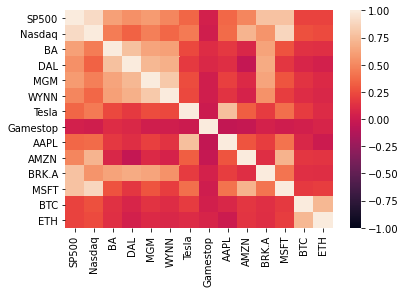

In [130]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
#Histogram plot of Daily Returns 

<AxesSubplot:ylabel='Frequency'>

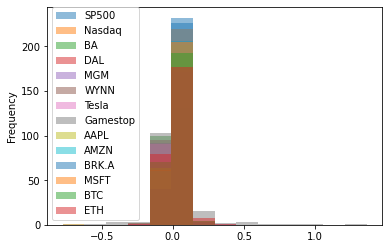

In [55]:
hist_plot = daily_returns.plot.hist(bins = 14, alpha=0.5)
hist_plot

In [ ]:
#Basic line plot of daily returns

<AxesSubplot:xlabel='Date'>

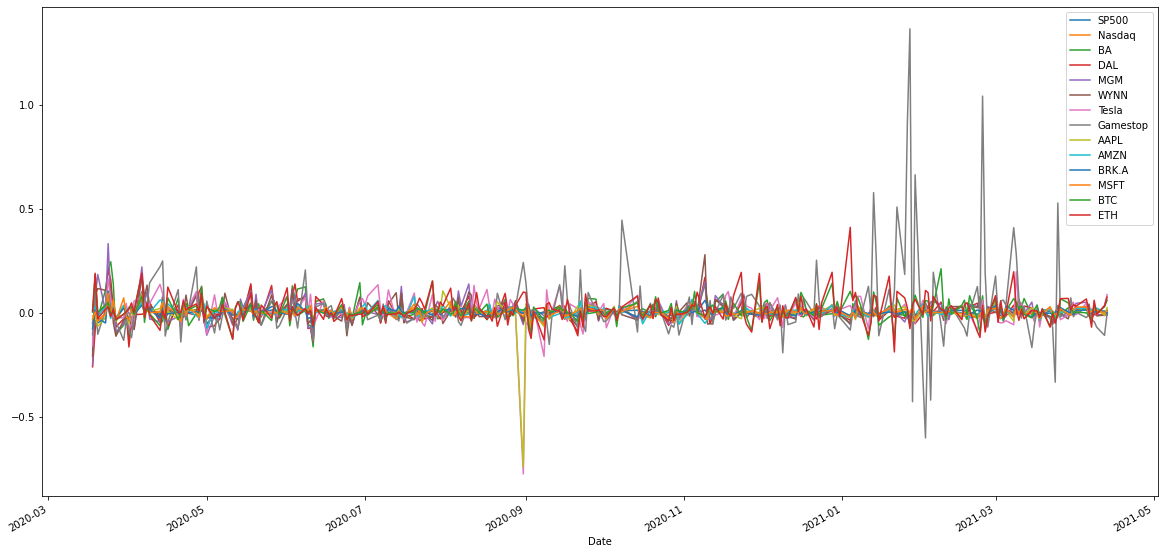

In [49]:
daily_returns.plot(figsize = (20, 10))

In [ ]:
#Interactive line plot of daily returns 

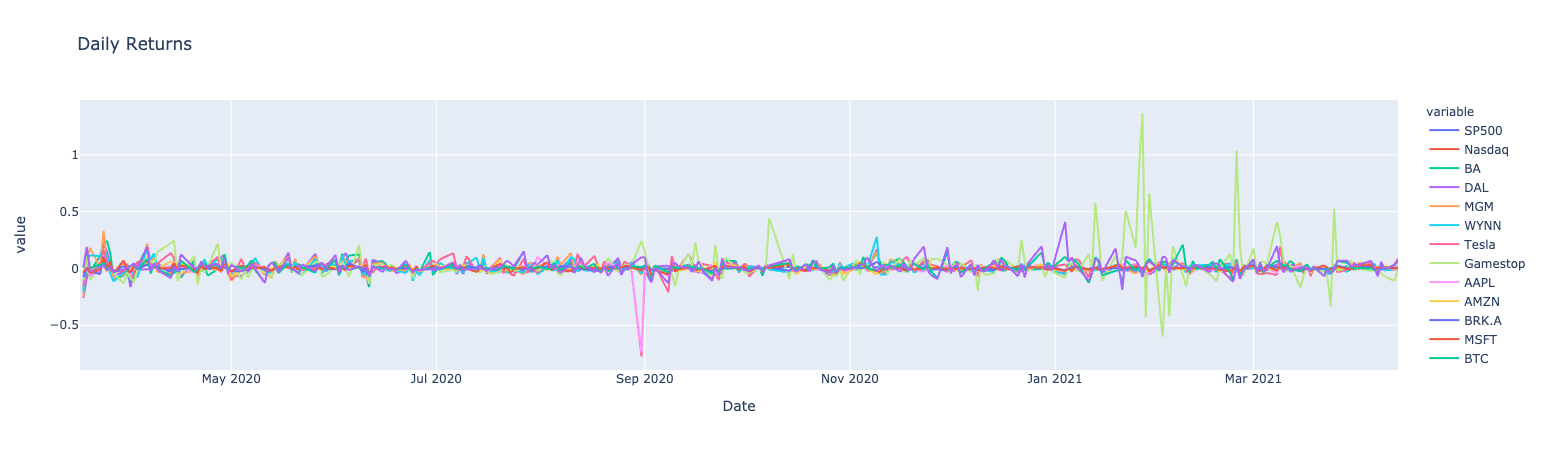

In [51]:
new_line_daily_returns = px.line(daily_returns, title= "Daily Returns")
new_line_daily_returns

In [ ]:
#Plotting density of daily returns 

<AxesSubplot:ylabel='Density'>

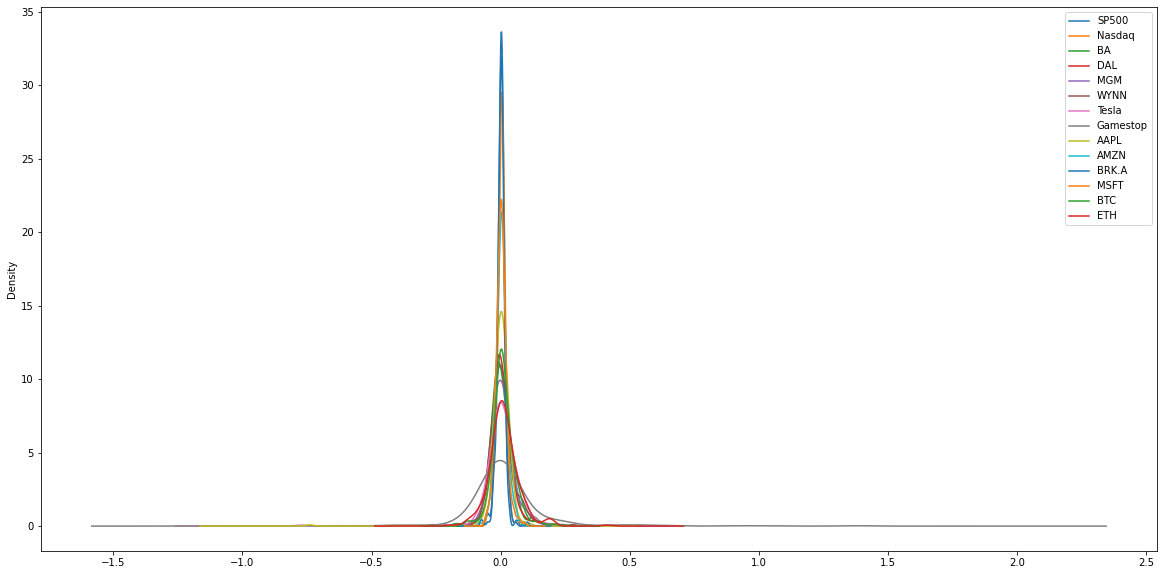

In [64]:
daily_returns.plot.density(figsize = (20,10))

In [ ]:
#Calculate volatility of daily returns 

In [67]:
volatility = daily_returns.std() * np.sqrt(252)
volatility

SP500       0.243360
Nasdaq      0.275586
BA          0.756248
DAL         0.727745
MGM         0.813498
WYNN        0.752344
Tesla       1.106407
Gamestop    2.713979
AAPL        0.821716
AMZN        0.343629
BRK.A       0.262591
MSFT        0.331168
BTC         0.695532
ETH         0.978595
dtype: float64

In [ ]:
#Calculate cumulative returns of daily returns 

In [73]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

,SP500,Nasdaq,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,,,
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,0.949367,0.952972,0.821495,0.739918,0.748428,0.791682,0.840930,0.893617,0.984774,1.013838,0.922699,0.969707,1.002451,1.007894
2020-03-19,0.951384,0.974887,0.787793,0.677379,0.807128,0.857011,0.993709,0.990544,0.968084,1.040456,0.932545,0.973392,1.184775,1.198794
2020-03-20,0.905063,0.937931,0.766024,0.672653,0.954927,0.956386,0.994256,0.887707,0.904647,1.021418,0.907280,0.933138,1.186226,1.164946
2020-03-23,0.881922,0.935361,0.850520,0.700378,0.959119,1.059257,1.009977,0.900709,0.883646,1.052651,0.862379,0.924882,1.227855,1.184030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-07,1.608346,1.866292,2.035878,1.581601,4.308176,2.441480,1.560535,42.016548,0.505873,1.814444,1.411148,1.704919,10.725777,17.298839
2021-04-08,1.615981,1.885443,2.054906,1.569313,4.418239,2.456202,1.590163,40.245863,0.515602,1.825842,1.413713,1.727912,11.161135,18.330028
2021-04-09,1.627729,1.895107,2.034306,1.552300,4.377358,2.417924,1.574465,37.427896,0.526004,1.865734,1.425095,1.745446,11.146027,18.185527


In [ ]:
#Creating a new dataframe without SP500 and NASDAQ

In [81]:
ourportfolio_daily_returns = daily_returns.drop(columns = ['SP500', 'Nasdaq'])
ourportfolio_daily_returns

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,-0.178505,-0.260082,-0.251572,-0.208318,-0.159070,-0.106383,-0.015226,0.013838,-0.077301,-0.030293,0.002451,0.007894
2020-03-19,-0.041025,-0.084522,0.078431,0.082520,0.181679,0.108466,-0.016948,0.026255,0.010671,0.003799,0.181878,0.189404
2020-03-20,-0.027633,-0.006977,0.183117,0.115954,0.000550,-0.103819,-0.065528,-0.018298,-0.027093,-0.041354,0.001225,-0.028235
2020-03-23,0.110304,0.041218,0.004391,0.107562,0.015812,0.014647,-0.023214,0.030578,-0.049489,-0.008847,0.035093,0.016382
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-07,-0.010269,-0.028074,-0.010116,-0.027631,-0.029518,-0.036171,0.013309,0.017184,-0.002041,0.008149,-0.036833,-0.069535
2021-04-08,0.009346,-0.007769,0.025547,0.006030,0.018986,-0.042143,0.019232,0.006282,0.001818,0.013486,0.040590,0.059610
2021-04-09,-0.010025,-0.010841,-0.009253,-0.015584,-0.009872,-0.070019,0.020173,0.021849,0.008051,0.010148,-0.001354,-0.007883


In [ ]:
#Apply weights to our portfolio to get our portfolio returns

In [82]:
weights = [6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 12.5, 12.5, 12.5, 12.5, 6.25, 6.25]

portfolio_returns = ourportfolio_daily_returns.dot(weights)
ourportfolio_daily_returns.head()

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,-0.178505,-0.260082,-0.251572,-0.208318,-0.159070,-0.106383,-0.015226,0.013838,-0.077301,-0.030293,0.002451,0.007894
2020-03-19,-0.041025,-0.084522,0.078431,0.082520,0.181679,0.108466,-0.016948,0.026255,0.010671,0.003799,0.181878,0.189404
2020-03-20,-0.027633,-0.006977,0.183117,0.115954,0.000550,-0.103819,-0.065528,-0.018298,-0.027093,-0.041354,0.001225,-0.028235
2020-03-23,0.110304,0.041218,0.004391,0.107562,0.015812,0.014647,-0.023214,0.030578,-0.049489,-0.008847,0.035093,0.016382


In [ ]:
#Cumulative returns of our portfolio

In [115]:
our_portfolio_cumulative_returns = (1 + ourportfolio_daily_returns).cumprod()
our_portfolio_cumulative_returns.head()

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
Date,,,,,,,,,,,,
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-18,0.821495,0.739918,0.748428,0.791682,0.840930,0.893617,0.984774,1.013838,0.922699,0.969707,1.002451,1.007894
2020-03-19,0.787793,0.677379,0.807128,0.857011,0.993709,0.990544,0.968084,1.040456,0.932545,0.973392,1.184775,1.198794
2020-03-20,0.766024,0.672653,0.954927,0.956386,0.994256,0.887707,0.904647,1.021418,0.907280,0.933138,1.186226,1.164946
2020-03-23,0.850520,0.700378,0.959119,1.059257,1.009977,0.900709,0.883646,1.052651,0.862379,0.924882,1.227855,1.184030


In [ ]:
#Plot our portfolio cumulative returns 

In [116]:
our_portfolio_cumulative_returns.hvplot.line(xlabel="Date", ylabel="Portfolio Cumulative Returns", title= 'Portfolio Cumulative Returns')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [ ]:
# Our portfolio standard deviation

In [117]:
ourportfolio_daily_std = ourportfolio_daily_returns.std()
ourportfolio_daily_std

BA          0.047639
DAL         0.045844
MGM         0.051246
WYNN        0.047393
Tesla       0.069697
Gamestop    0.170965
AAPL        0.051763
AMZN        0.021647
BRK.A       0.016542
MSFT        0.020862
BTC         0.043814
ETH         0.061646
dtype: float64

In [ ]:
#Sorting standard deviation by descending order 

In [118]:
ourportfolio_daily_std = ourportfolio_daily_std.sort_values(ascending=False)
ourportfolio_daily_std

Gamestop    0.170965
Tesla       0.069697
ETH         0.061646
AAPL        0.051763
MGM         0.051246
BA          0.047639
WYNN        0.047393
DAL         0.045844
BTC         0.043814
AMZN        0.021647
MSFT        0.020862
BRK.A       0.016542
dtype: float64

In [120]:
ourportfolio_daily_std.hvplot.line(xlabel = "Our Stocks", ylabel = "Standard Deviation", title = "Our Portfolio's Standard Deviation")

:Curve   [index]   (0)

In [ ]:
#Finding our portfolios correlation

In [131]:
ourportfolio_correlation = ourportfolio_daily_returns.corr()
ourportfolio_correlation

,BA,DAL,MGM,WYNN,Tesla,Gamestop,AAPL,AMZN,BRK.A,MSFT,BTC,ETH
BA,1.000000,0.780275,0.634832,0.613152,0.238801,0.115109,0.171820,0.084059,0.630350,0.280835,0.135331,0.132757
DAL,0.780275,1.000000,0.728344,0.692758,0.174732,0.090588,0.122642,-0.034851,0.669960,0.159567,0.071424,0.039906
MGM,0.634832,0.728344,1.000000,0.819116,0.251777,0.026749,0.198406,0.101003,0.639930,0.283246,0.143374,0.095323
WYNN,0.613152,0.692758,0.819116,1.000000,0.239368,0.028045,0.147971,0.056002,0.552093,0.193567,0.110065,0.079669
Tesla,0.238801,0.174732,0.251777,0.239368,1.000000,0.003019,0.772182,0.321711,0.184196,0.395845,0.181403,0.106673
Gamestop,0.115109,0.090588,0.026749,0.028045,0.003019,1.000000,-0.045236,-0.025477,0.049356,0.023258,0.033716,0.067342
AAPL,0.171820,0.122642,0.198406,0.147971,0.772182,-0.045236,1.000000,0.288503,0.191005,0.413054,0.079482,0.000337
AMZN,0.084059,-0.034851,0.101003,0.056002,0.321711,-0.025477,0.288503,1.000000,0.121083,0.706467,0.157317,0.150171
BRK.A,0.630350,0.669960,0.639930,0.552093,0.184196,0.049356,0.191005,0.121083,1.000000,0.419618,0.132048,0.123210
MSFT,0.280835,0.159567,0.283246,0.193567,0.395845,0.023258,0.413054,0.706467,0.419618,1.000000,0.172583,0.192686


In [ ]:
#Plotting our portfolios correlation with a heatmap

<AxesSubplot:>

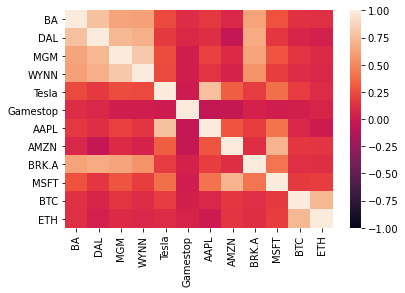

In [132]:
sns.heatmap(ourportfolio_correlation, vmin=-1, vmax=1)

In [140]:
#Calculate Covariance of Portfolio Returns vs. S&P 500 Returns

In [142]:
covariance = portfolio_returns.cov(daily_returns['SP500'])
covariance

0.02679468588713824

In [143]:
#Calculate Variance of S&P 500 Returns

In [144]:
variance = daily_returns['SP500'].var()
variance

0.00023501534382044234

In [145]:
#Calculate Beta Values of Portfolio

In [147]:
beta = covariance/variance
beta

114.01249574415046

In [ ]:
#Calculate 30-Day Rolling Covariance of Portfolio Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

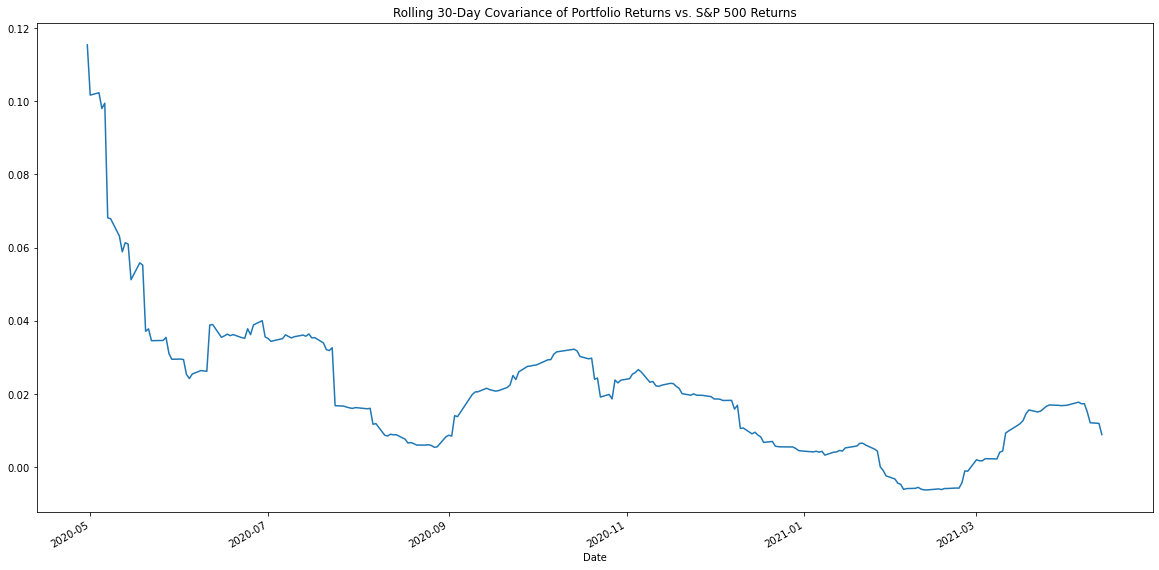

In [151]:
rolling_covariance_30 = portfolio_returns.rolling(window=30).cov(daily_returns['SP500'])
rolling_covariance_30.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Portfolio Returns vs. S&P 500 Returns')

In [ ]:
#Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='Date'>

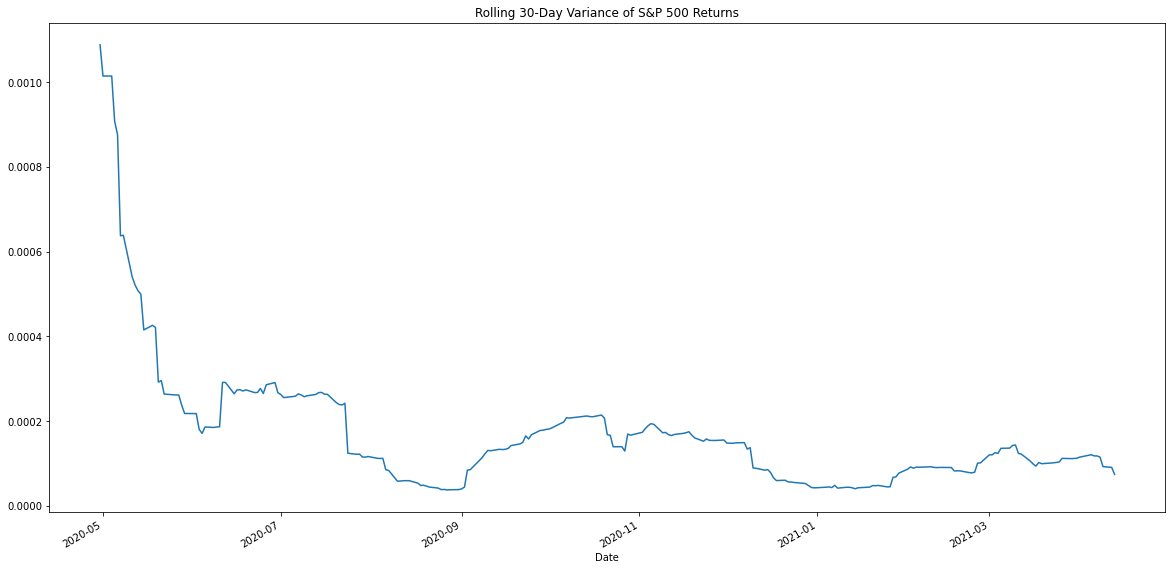

In [152]:
rolling_variance_30 = daily_returns['SP500'].rolling(window=30).var()
rolling_variance_30.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

In [ ]:
#Calculate 30-Day Rolling Beta of Our Portfolio

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Our Portfolio'}, xlabel='Date'>

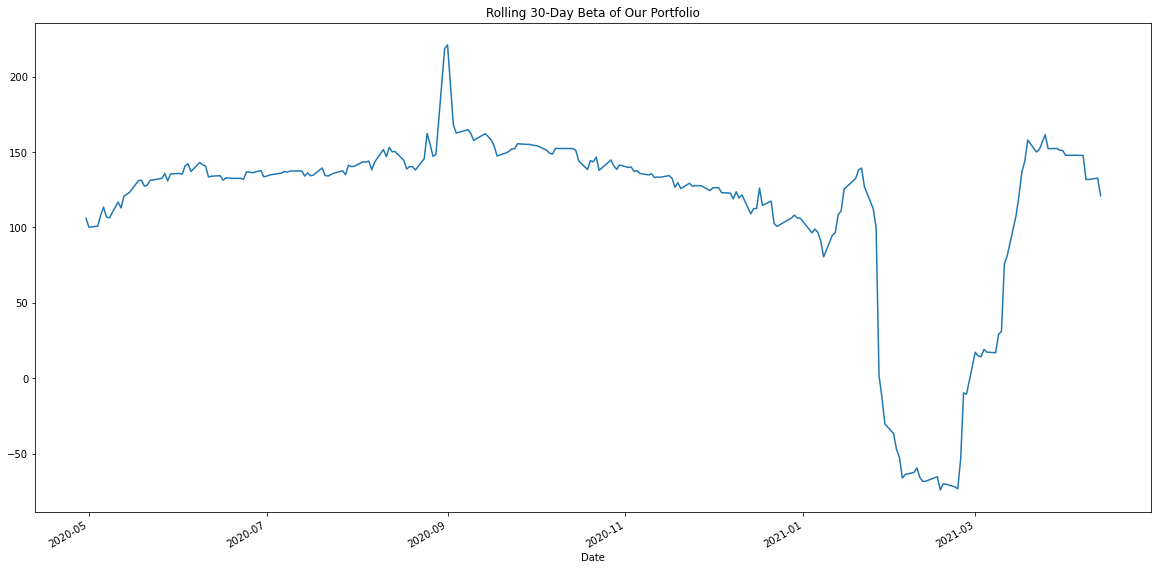

In [153]:
rolling_beta_30 = rolling_covariance_30 / rolling_variance_30
rolling_beta_30.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Our Portfolio')

In [154]:
#Calculate 50-Day Rolling Covariance of Portfolio Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 50-Day Covariance of Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

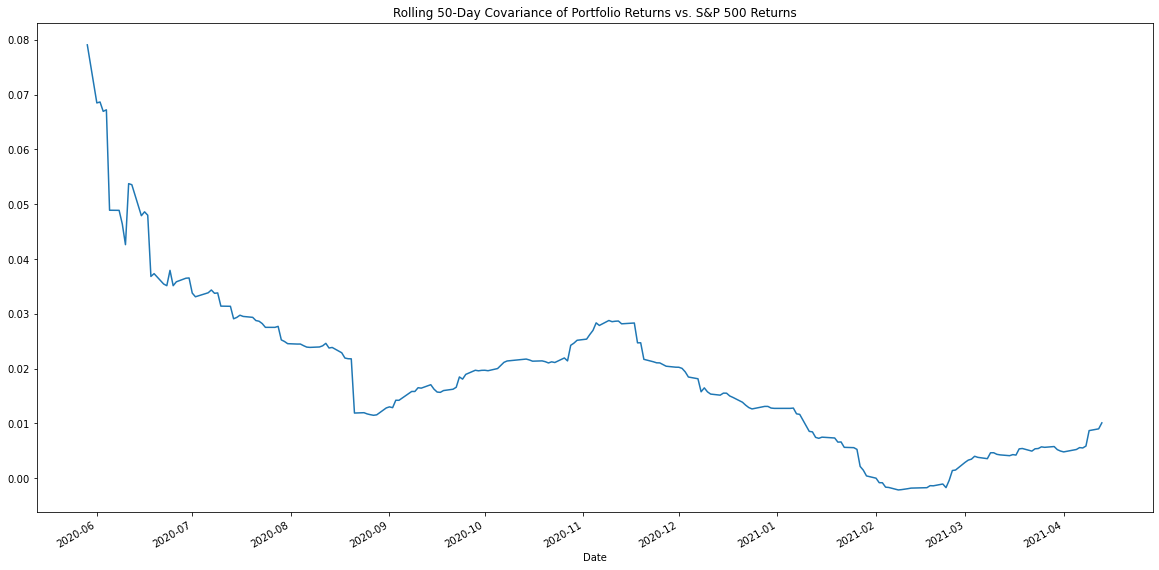

In [155]:
rolling_covariance_50 = portfolio_returns.rolling(window=50).cov(daily_returns['SP500'])
rolling_covariance_50.plot(figsize=(20, 10), title='Rolling 50-Day Covariance of Portfolio Returns vs. S&P 500 Returns')

In [156]:
#Calculate 50-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 50-Day Variance of S&P 500 Returns'}, xlabel='Date'>

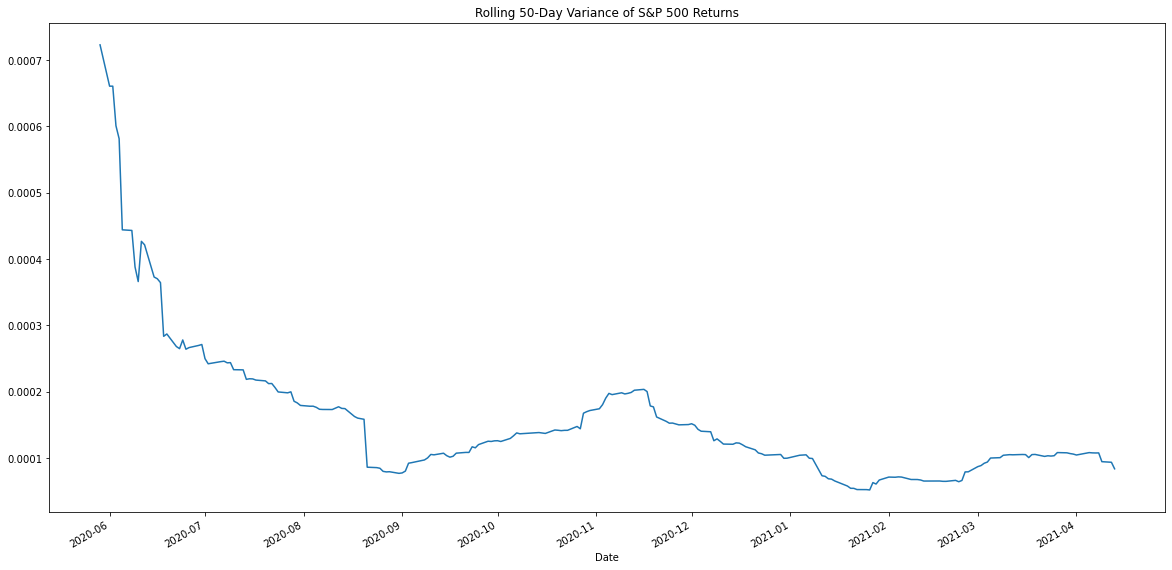

In [157]:
rolling_variance_50 = daily_returns['SP500'].rolling(window=50).var()
rolling_variance_50.plot(figsize=(20, 10), title='Rolling 50-Day Variance of S&P 500 Returns')

In [158]:
#Calculate 50-Day Rolling Beta of Our Portfolio

<AxesSubplot:title={'center':'Rolling 50-Day Beta of Our Portfolio'}, xlabel='Date'>

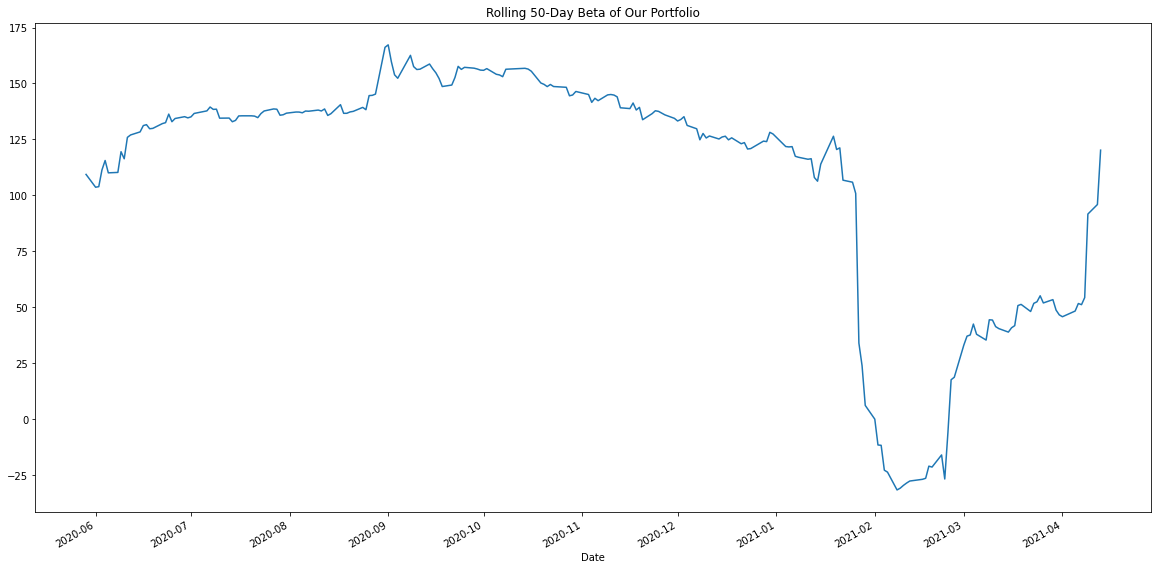

In [159]:
rolling_beta_50 = rolling_covariance_50 / rolling_variance_50
rolling_beta_50.plot(figsize=(20, 10), title='Rolling 50-Day Beta of Our Portfolio')

In [160]:
#Calculate 180-Day Rolling Covariance of Portfolio Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 180-Day Covariance of Portfolio Returns vs. S&P 500 Returns'}, xlabel='Date'>

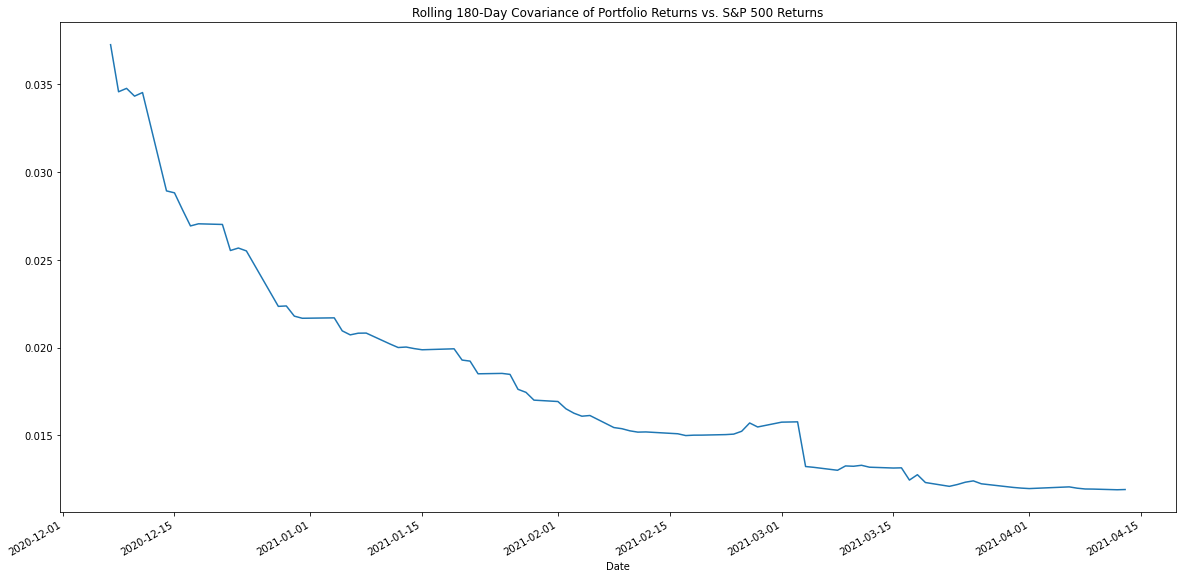

In [161]:
rolling_covariance_180 = portfolio_returns.rolling(window=180).cov(daily_returns['SP500'])
rolling_covariance_180.plot(figsize=(20, 10), title='Rolling 180-Day Covariance of Portfolio Returns vs. S&P 500 Returns')

In [162]:
#Calculate 180-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 180-Day Variance of S&P 500 Returns'}, xlabel='Date'>

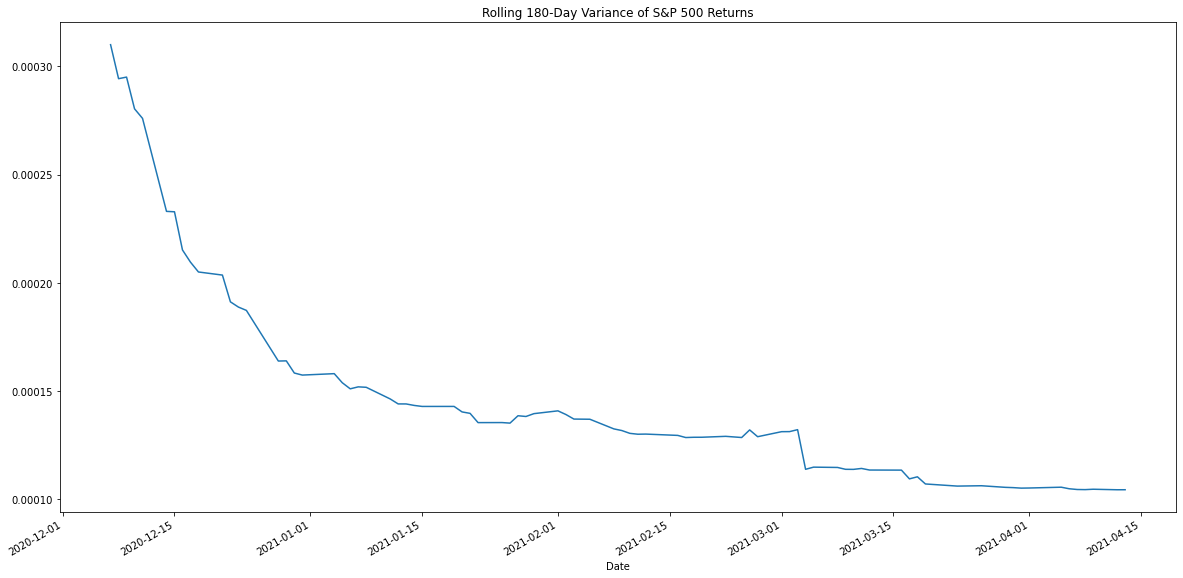

In [163]:
rolling_variance_180 = daily_returns['SP500'].rolling(window=180).var()
rolling_variance_180.plot(figsize=(20, 10), title='Rolling 180-Day Variance of S&P 500 Returns')

In [164]:
#Calculate 180-Day Rolling Beta of Our Portfolio

<AxesSubplot:title={'center':'Rolling 50-Day Beta of Our Portfolio'}, xlabel='Date'>

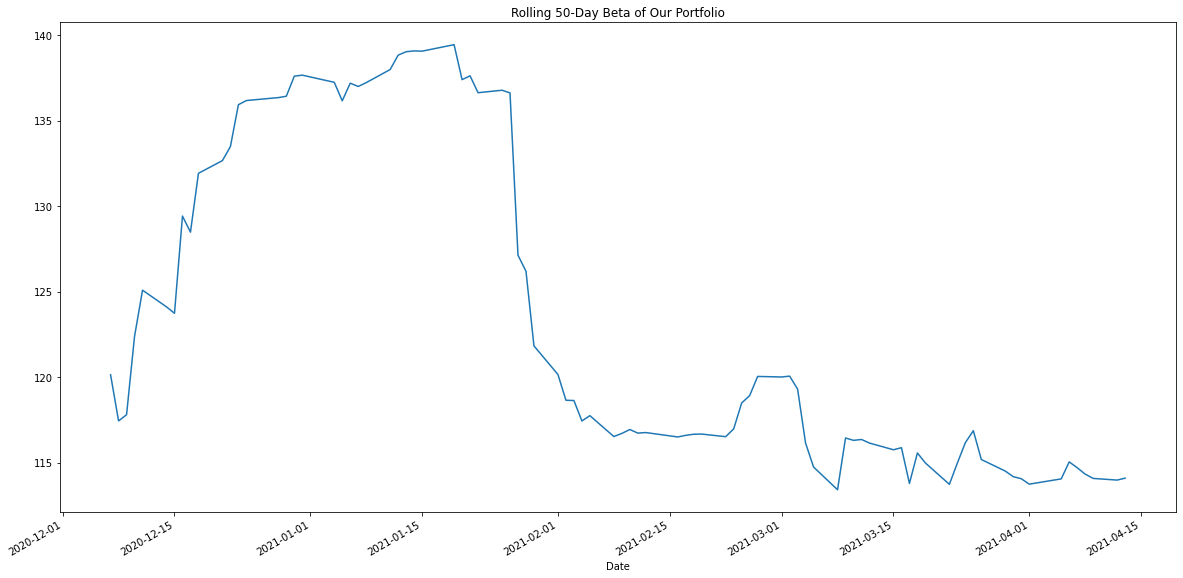

In [167]:
rolling_beta_180 = rolling_covariance_180 / rolling_variance_180
rolling_beta_180.plot(figsize=(20, 10), title='Rolling 50-Day Beta of Our Portfolio')